#### Importing libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

#### Loading data

In [45]:
data =pd. read_csv("data_for_lr.csv")

In [46]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [48]:
data.isnull().sum()
# the sum of y=1 implies that there is a missing value

x    0
y    1
dtype: int64

#### Data Processing

In [49]:
#drop the null value
data=data.dropna()

In [50]:
data.shape


(699, 2)

#### Splitting Data

In [51]:
# training input and output
training_input=np.array(data.x[0:500]).reshape(500,1)
training_output=np.array(data.y[0:500]).reshape(500,1)

#validation data input and output
test_input=np.array(data.x[500:699]).reshape(199,1)
test_output=np.array(data.y[500:699]).reshape(199,1)

print(f"training input data shape= {training_input.shape}")
print(f"training output data shape= {training_output.shape}")
print(f"test input data shape= {test_input.shape}")
print(f"test input data shape= {test_input.shape}")

#### Linear Regression

##### Forward Propagation

f(x)=m*x+c


In [52]:
def forward_propagation(training_input, parameters):
    c=parameters["c"]
    m=parameters["m"]
    predictions= np.multiply(m,training_input)+c
    return predictions
    

#### Cost Function

summation(1/2n*(y-f(x))^2)

In [53]:
def cost_function(predictions, training_output):
    cost=np.mean((training_output -predictions)**2)*0.5
    return cost

#### Gradient Descent for Backpropagation

* df= (f(x)-y)/n
* dm=df*x/n
* dc=df*1/n

In [54]:
def backward_propagation(training_input,training_output, predictions):
    derivatives=dict()
    df= (predictions-training_output)
    dm=np.mean(np.multiply(df,training_input))
    dc=np.mean(df)
    
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    
    return derivatives



#### Update Parameters


* m=m-(learning_rate *dm)
* c=c-(learning_rate *dc)

In [55]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"]=parameters["m"]-learning_rate*derivatives['dm']
    parameters["c"]=parameters["c"]-learning_rate*derivatives['dc']
    return parameters

#### Model Training

In [67]:
def train(training_input, training_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)
    parameters["c"] = np.random.uniform(0,1) 
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(training_input, parameters)
        
        #cost function
        cost = cost_function(predictions, training_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(training_input, training_output, '+', label='Original')
        ax.plot(training_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(training_input, training_output, '+')
        plt.plot(training_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(training_input, training_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

### Training

Iteration = 1, Loss = 1264.5276220370051


<Figure size 640x480 with 0 Axes>

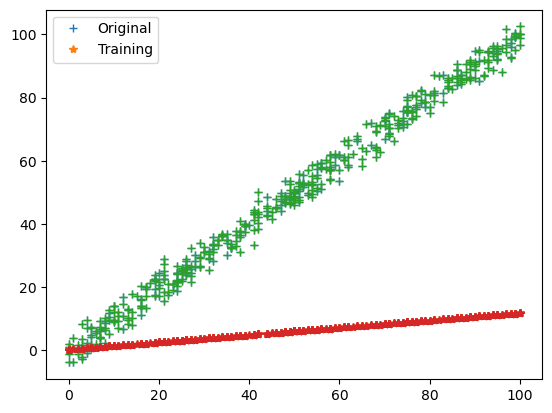

Iteration = 2, Loss = 575.8666728306935


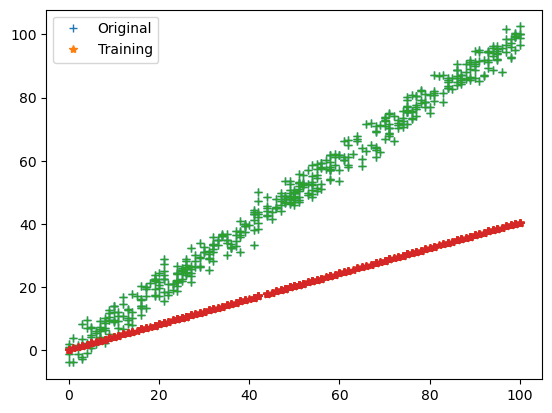

Iteration = 3, Loss = 263.42043673850907


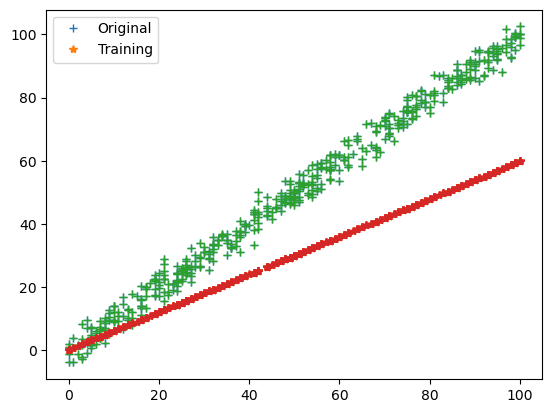

Iteration = 4, Loss = 121.66323269715858


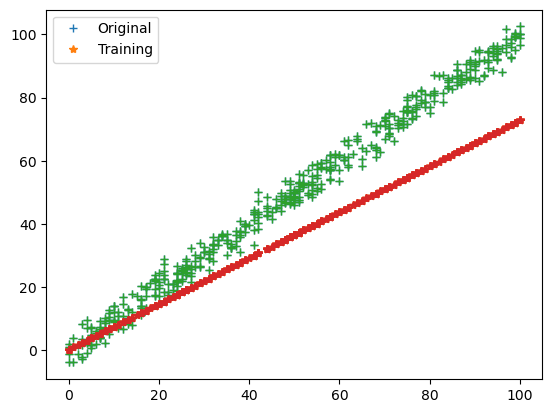

Iteration = 5, Loss = 57.347831559510645


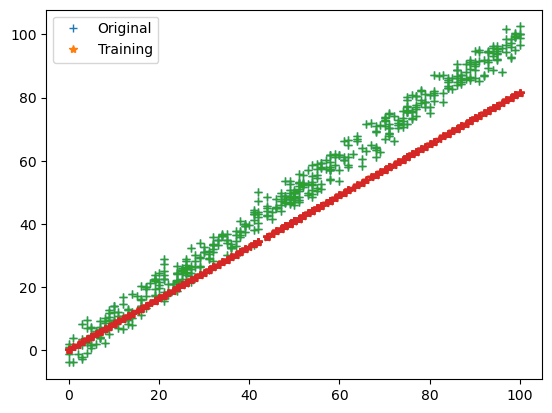

Iteration = 6, Loss = 28.16786217703791


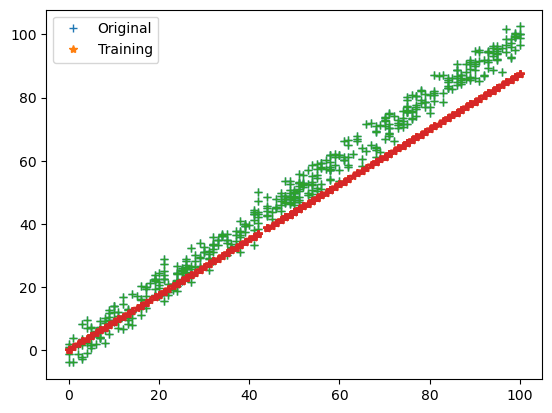

Iteration = 7, Loss = 14.928877099373036


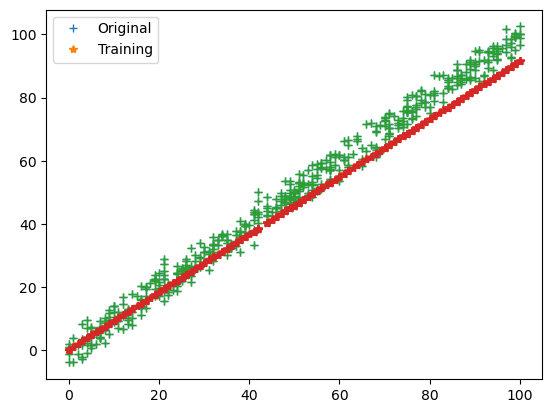

Iteration = 8, Loss = 8.922334257723346


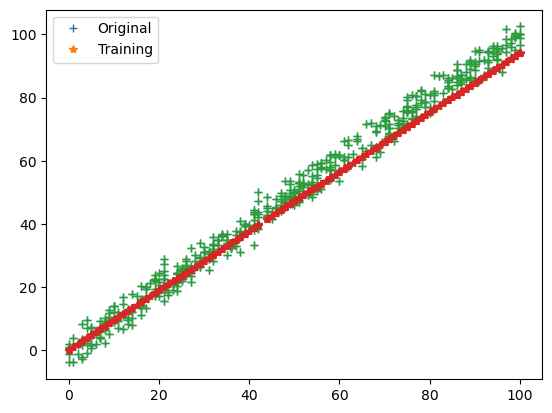

Iteration = 9, Loss = 6.197158469537462


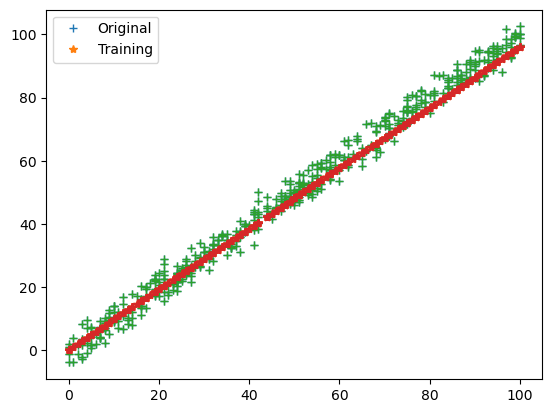

Iteration = 10, Loss = 4.960742548118154


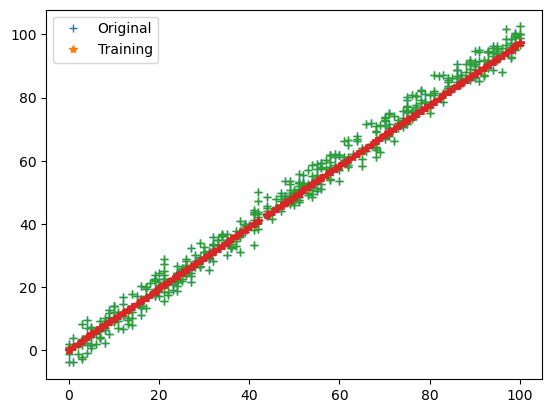

Iteration = 11, Loss = 4.399778627295256


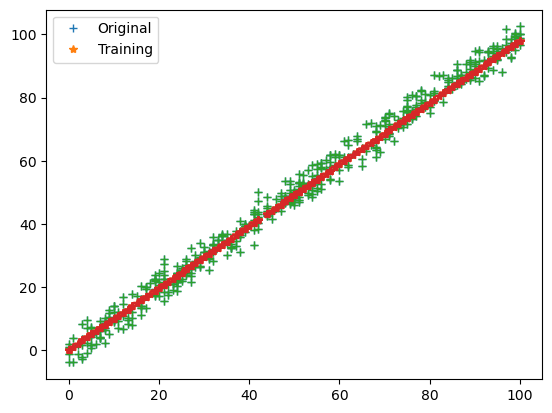

Iteration = 12, Loss = 4.145268027334035


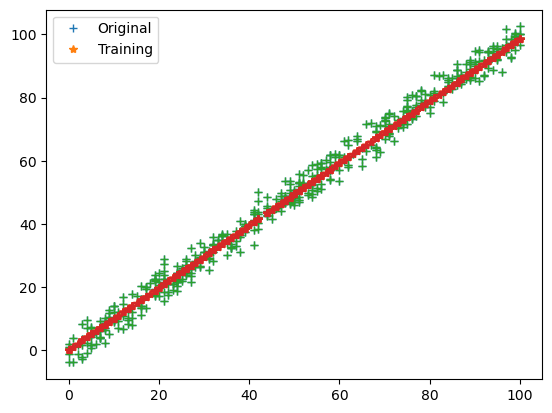

Iteration = 13, Loss = 4.029795638520732


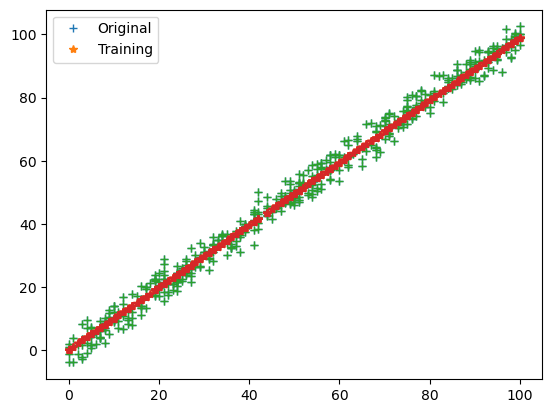

Iteration = 14, Loss = 3.977405040142311


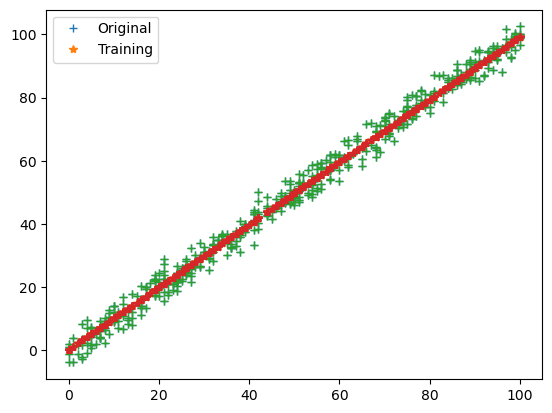

Iteration = 15, Loss = 3.9536347199888136


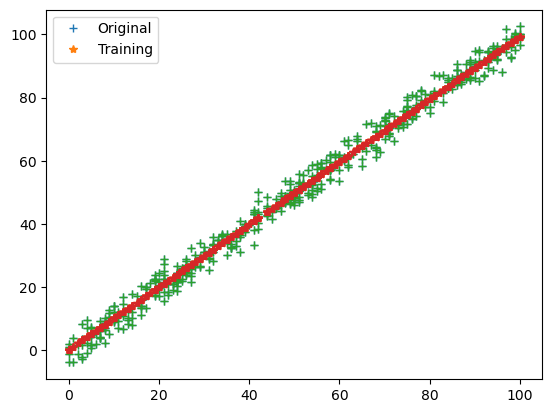

Iteration = 16, Loss = 3.9428494517995882


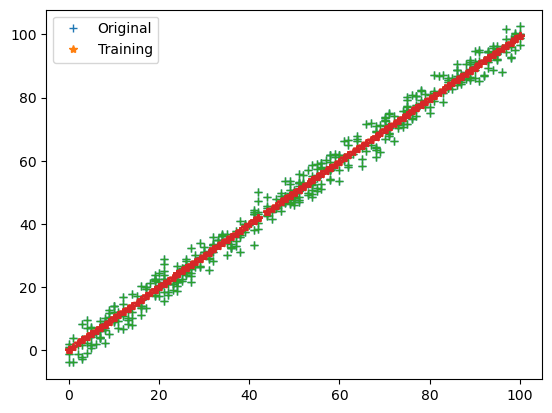

Iteration = 17, Loss = 3.9379555161019533


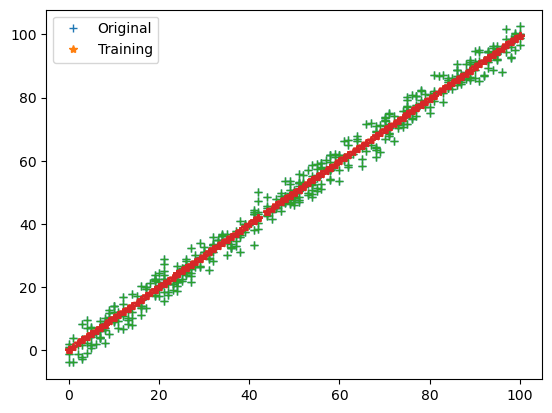

Iteration = 18, Loss = 3.9357344845138558


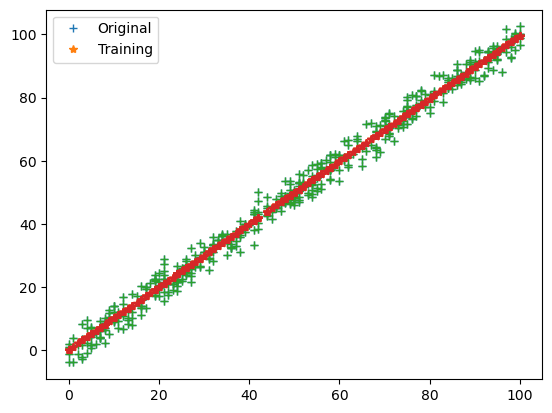

Iteration = 19, Loss = 3.9347261525134942


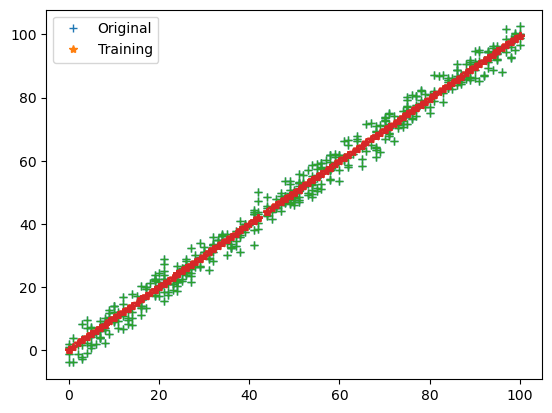

Iteration = 20, Loss = 3.934268023691941


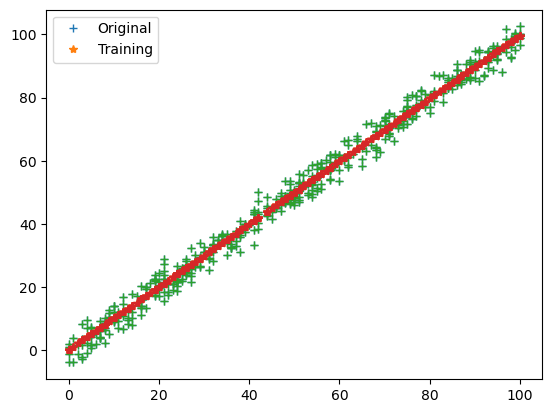

In [68]:
parameters, loss =train(training_input, training_output, 0.0001, 20)

Iteration = 1, Loss = 5079.810151043078


<Figure size 640x480 with 0 Axes>

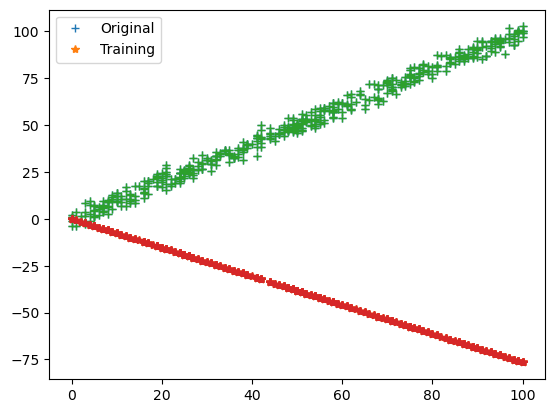

Iteration = 2, Loss = 537549860.5237814


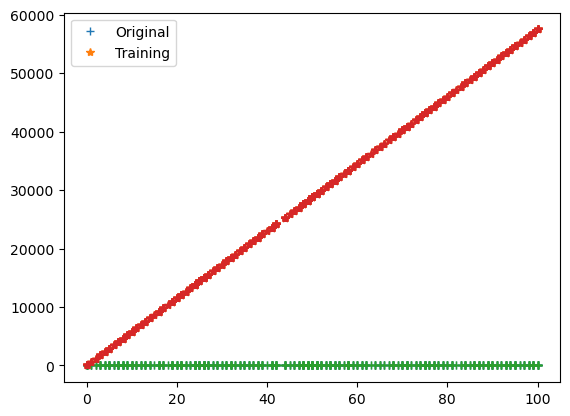

Iteration = 3, Loss = 56927863188370.51


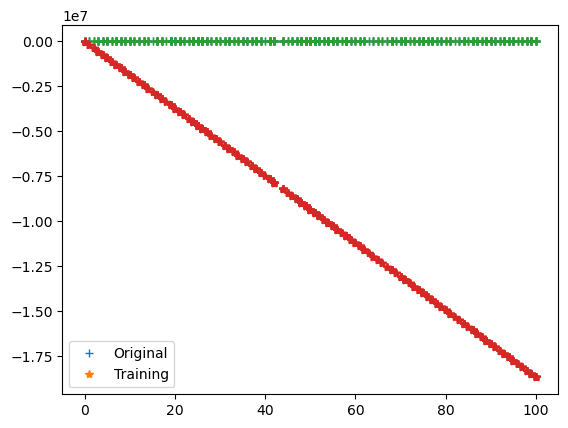

Iteration = 4, Loss = 6.028801919209177e+18


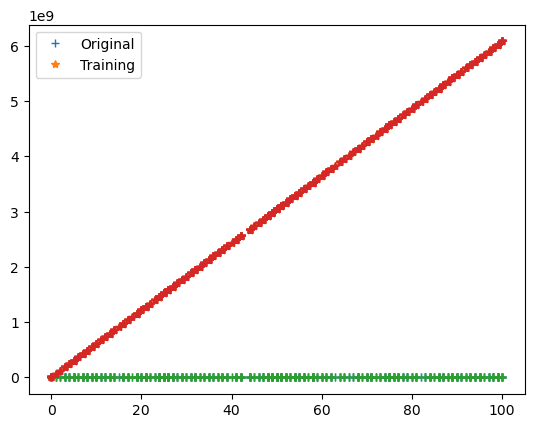

Iteration = 5, Loss = 6.384650774752387e+23


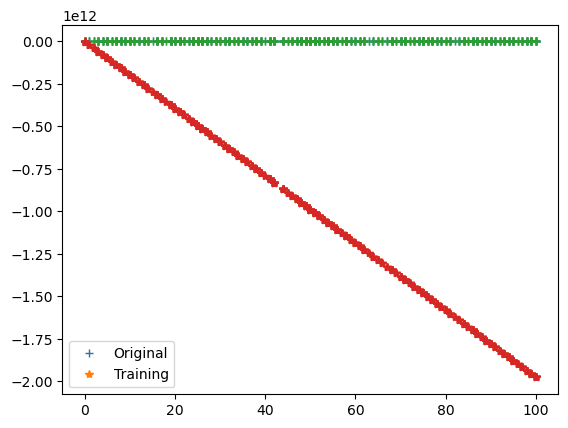

Iteration = 6, Loss = 6.761503539478275e+28


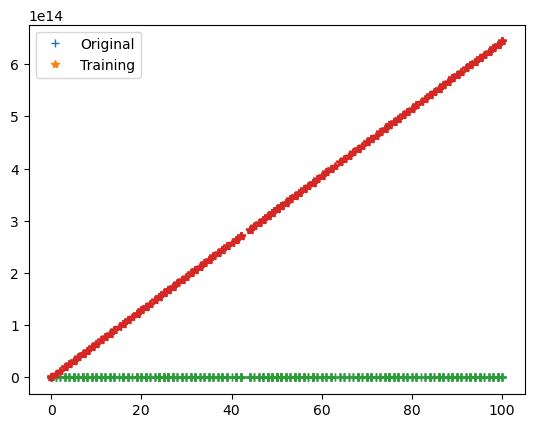

Iteration = 7, Loss = 7.16059996502319e+33


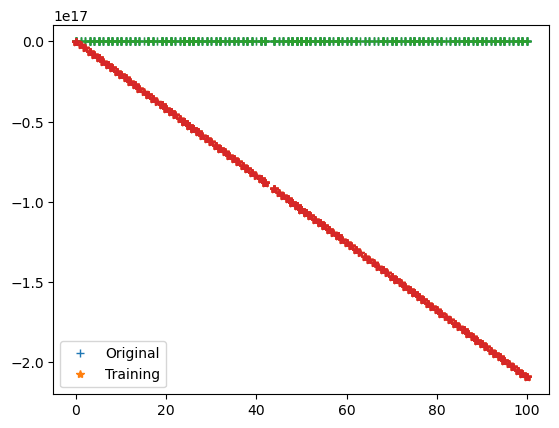

Iteration = 8, Loss = 7.583252979121635e+38


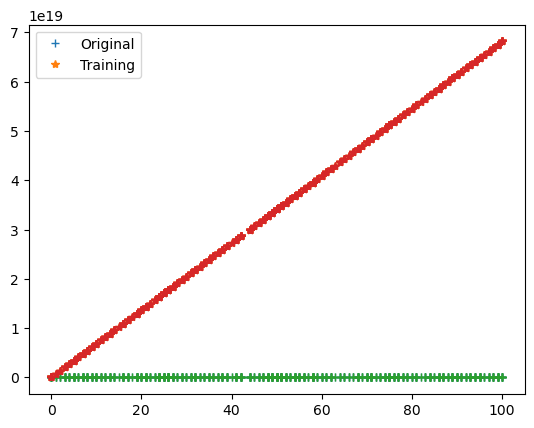

Iteration = 9, Loss = 8.030853004811158e+43


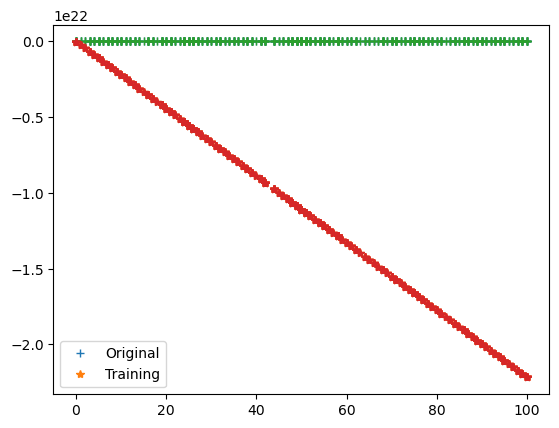

Iteration = 10, Loss = 8.504872534577477e+48


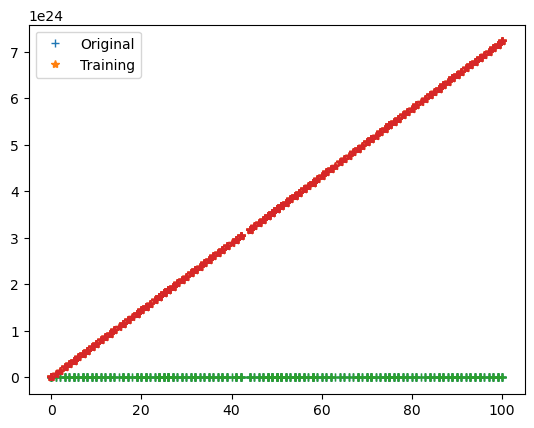

Iteration = 11, Loss = 9.006870974487621e+53


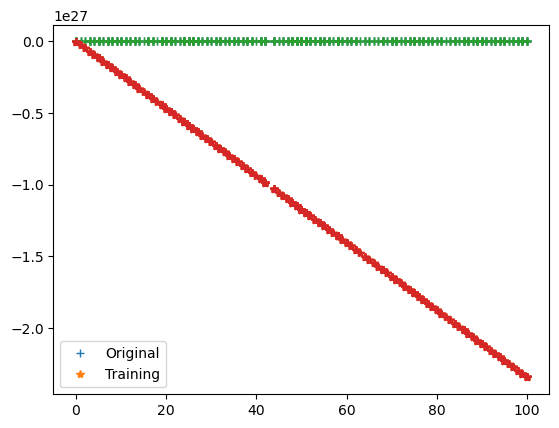

Iteration = 12, Loss = 9.538499774247091e+58


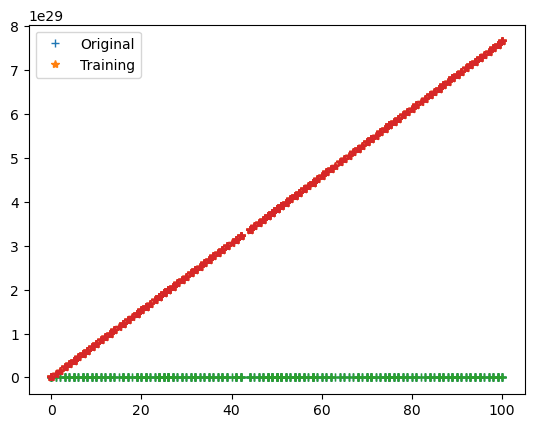

Iteration = 13, Loss = 1.0101507860057651e+64


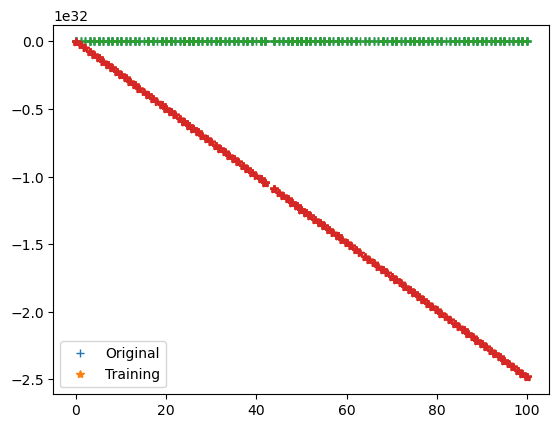

Iteration = 14, Loss = 1.0697747388148463e+69


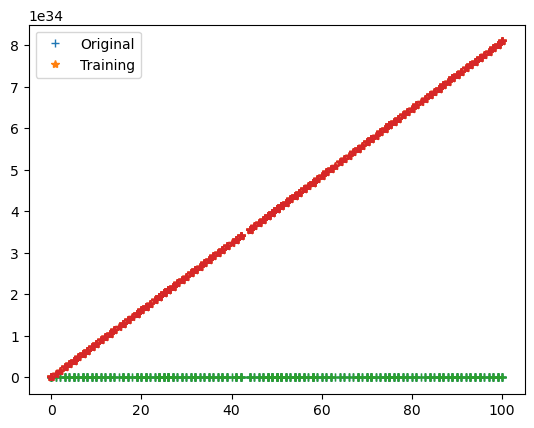

Iteration = 15, Loss = 1.132917983790829e+74


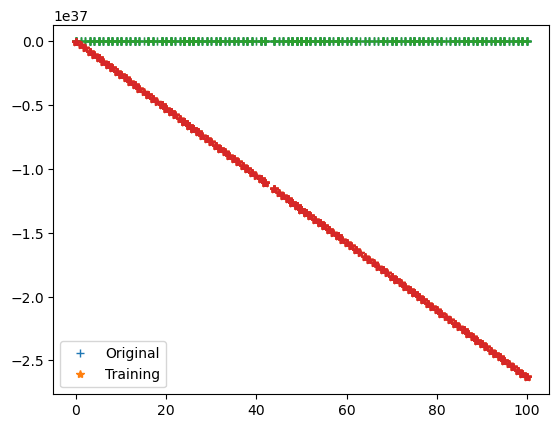

Iteration = 16, Loss = 1.1997882464663639e+79


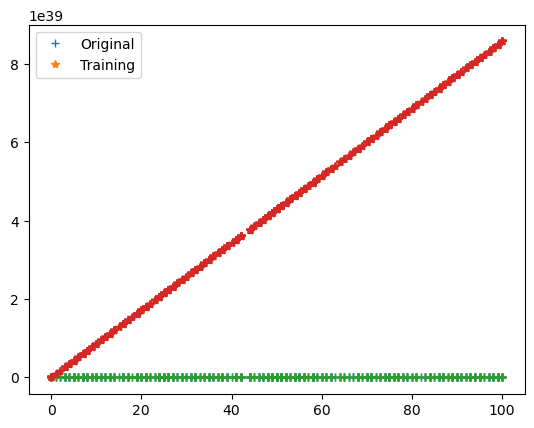

Iteration = 17, Loss = 1.2706055133330867e+84


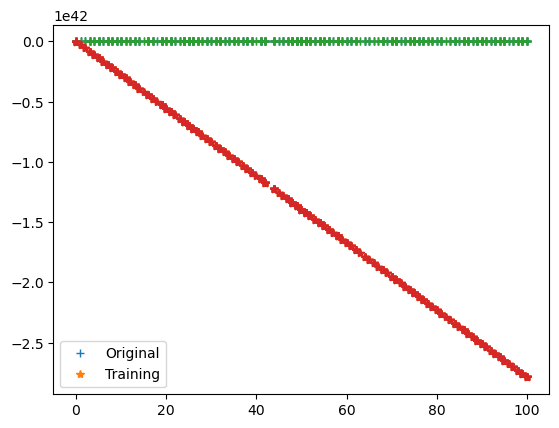

Iteration = 18, Loss = 1.345602755542328e+89


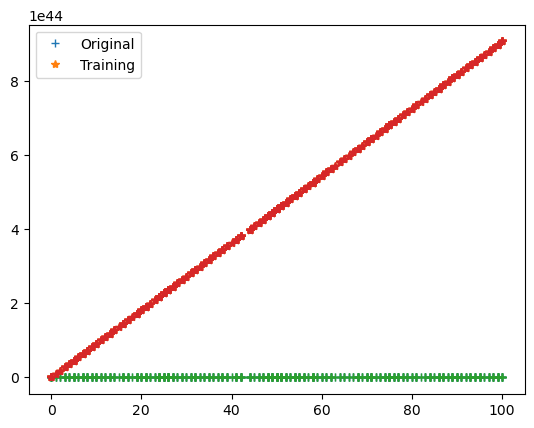

Iteration = 19, Loss = 1.4250266953221141e+94


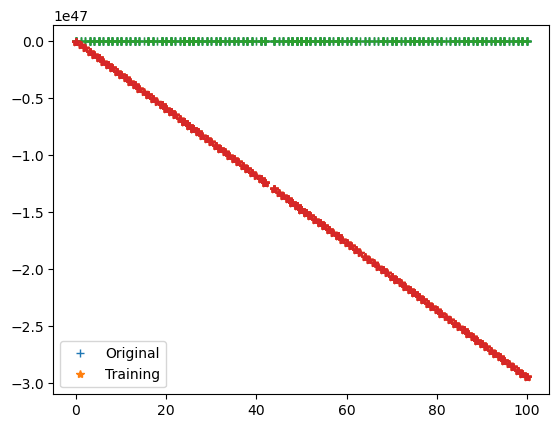

Iteration = 20, Loss = 1.5091386176317817e+99


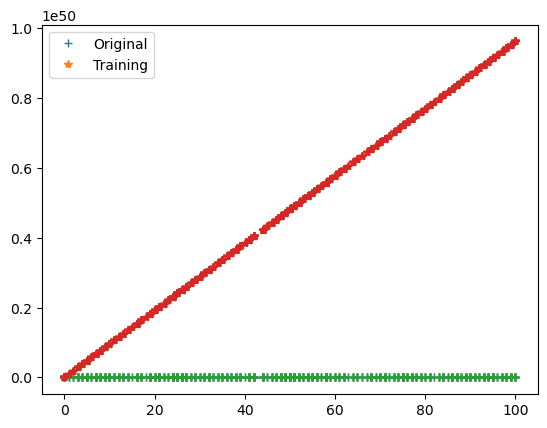

In [64]:
parameters, loss =train(training_input, training_output, 0.1, 20)

In [65]:
print(parameters)

{'m': -3.1288884042800763e+50, 'c': -4.737535030393598e+48}


### Let's Predict

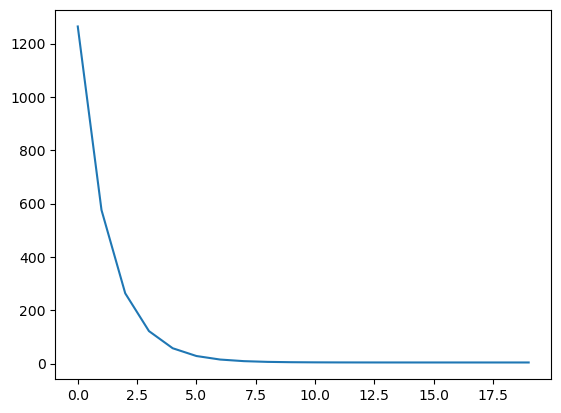

In [69]:
plt.plot(loss)

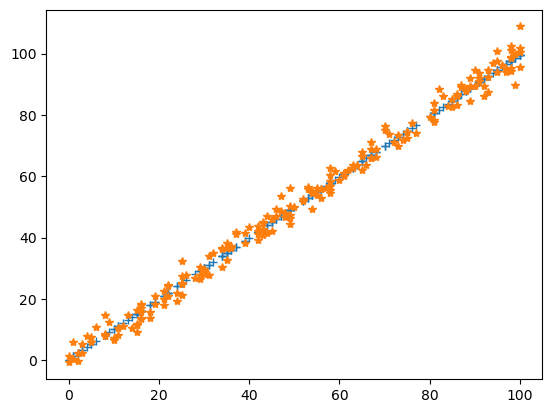

In [72]:
test_predictions= test_input*parameters['m']+parameters['c']
plt.plot(test_input, test_predictions,"+")
plt.plot(test_input,test_output,'*')
plt.show()

## cost of prediction

In [76]:
cost_function(test_output, test_predictions)

3.996952015906403

In [77]:
pred+-3.9969

NameError: name 'pred' is not defined